In [1]:
# Tyler Edwards
# LoL Esports Bans

import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
import matplotlib.cm
import pandas as pd
import numpy as np
import os


In [2]:
# Data is from Oracle's Exlixir Google drive.
file = "2023_LoL_esports_match_data_from_OraclesElixir.csv"
df = pd.read_csv(file)

# *** Change "scope" to the league, team, or patch you want to filter the data for, and uncomment the appropriate filter below.
# Commenting out 
scope = 'T1' # Region/Team/patch/etc.

df = df[df['league'] == "WLDs"]
# df = df[df['teamname'] == scope]
df = df[df['patch'] == 13.19] # Excluding anything before play-ins

# Removing the aggregated team rows
teamrows = df["position"] != "team"
df = df.drop(df[teamrows].index)

# Creating an ID for each game + which team they were on that game
df["gameside"] = df["gameid"] + "|" + df["side"]

df['side'] = df['side'].map({'Blue': 0, 'Red': 1})

print(df.shape)
df.head(10)

(14, 124)


C:\Users\Ty\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,gameside
123730,ESPORTSTMNT06_2827798,complete,NaN,WLDs,2023,NaN,0,2023-10-09 04:09:51,1,13.19,...,-6019.0,-2734.0,-31.0,2.0,4.0,8.0,8.0,13.0,2.0,ESPORTSTMNT06_2827798|Blue
123731,ESPORTSTMNT06_2827798,complete,NaN,WLDs,2023,NaN,0,2023-10-09 04:09:51,1,13.19,...,6019.0,2734.0,31.0,8.0,13.0,2.0,2.0,4.0,8.0,ESPORTSTMNT06_2827798|Red
123742,ESPORTSTMNT06_2828803,complete,NaN,WLDs,2023,NaN,0,2023-10-09 04:51:13,2,13.19,...,3302.0,1010.0,22.0,3.0,1.0,2.0,2.0,0.0,3.0,ESPORTSTMNT06_2828803|Blue
123743,ESPORTSTMNT06_2828803,complete,NaN,WLDs,2023,NaN,0,2023-10-09 04:51:13,2,13.19,...,-3302.0,-1010.0,-22.0,2.0,0.0,3.0,3.0,1.0,2.0,ESPORTSTMNT06_2828803|Red
123754,ESPORTSTMNT06_2827812,complete,NaN,WLDs,2023,NaN,0,2023-10-09 05:46:19,3,13.19,...,1126.0,1545.0,4.0,3.0,3.0,0.0,0.0,0.0,3.0,ESPORTSTMNT06_2827812|Blue
123755,ESPORTSTMNT06_2827812,complete,NaN,WLDs,2023,NaN,0,2023-10-09 05:46:19,3,13.19,...,-1126.0,-1545.0,-4.0,0.0,0.0,3.0,3.0,3.0,0.0,ESPORTSTMNT06_2827812|Red
123838,ESPORTSTMNT06_2829811,complete,NaN,WLDs,2023,NaN,0,2023-10-10 07:17:44,1,13.19,...,-1028.0,-230.0,27.0,2.0,3.0,4.0,4.0,13.0,2.0,ESPORTSTMNT06_2829811|Blue
123839,ESPORTSTMNT06_2829811,complete,NaN,WLDs,2023,NaN,0,2023-10-10 07:17:44,1,13.19,...,1028.0,230.0,-27.0,4.0,13.0,2.0,2.0,3.0,4.0,ESPORTSTMNT06_2829811|Red
123850,ESPORTSTMNT06_2829821,complete,NaN,WLDs,2023,NaN,0,2023-10-10 08:06:09,2,13.19,...,2061.0,391.0,28.0,4.0,7.0,2.0,2.0,2.0,4.0,ESPORTSTMNT06_2829821|Blue
123851,ESPORTSTMNT06_2829821,complete,NaN,WLDs,2023,NaN,0,2023-10-10 08:06:09,2,13.19,...,-2061.0,-391.0,-28.0,2.0,2.0,4.0,4.0,7.0,2.0,ESPORTSTMNT06_2829821|Red


In [3]:
# Dataframe with only relevant columns
df3 = pd.DataFrame(columns = ["champion1", "champion2"])

# For each 'gameside' there is a row made for every combination of two champions on that team.
for i in df.gameside.unique():
    team_df = df.loc[(df['gameside'] == i)]
    bandf = team_df[['ban1', 'ban2', 'ban3', 'ban4', 'ban5']]
    banlist = []
    for i in bandf:
        for j in bandf[i]:
            banlist.append(j)
    combinations = [(a, b) for idx, a in enumerate(banlist) for b in banlist[idx + 1:]]
    for i in combinations:
        new_row = {"champion1": i[0], "champion2": i[1]}
        df3.loc[len(df3)] = new_row
        
print(df3.shape)
df3.head(10)

(140, 2)


,champion1,champion2
0,Olaf,Xayah
1,Olaf,Poppy
2,Olaf,Lee Sin
3,Olaf,Ezreal
4,Xayah,Poppy
5,Xayah,Lee Sin
6,Xayah,Ezreal
7,Poppy,Lee Sin
8,Poppy,Ezreal
9,Lee Sin,Ezreal


In [4]:
# Creating network and graphs

G = nx.from_pandas_edgelist(df3, 'champion1', 'champion2', create_using=nx.Graph())
d = dict(G.degree)

0.270935960591133
4


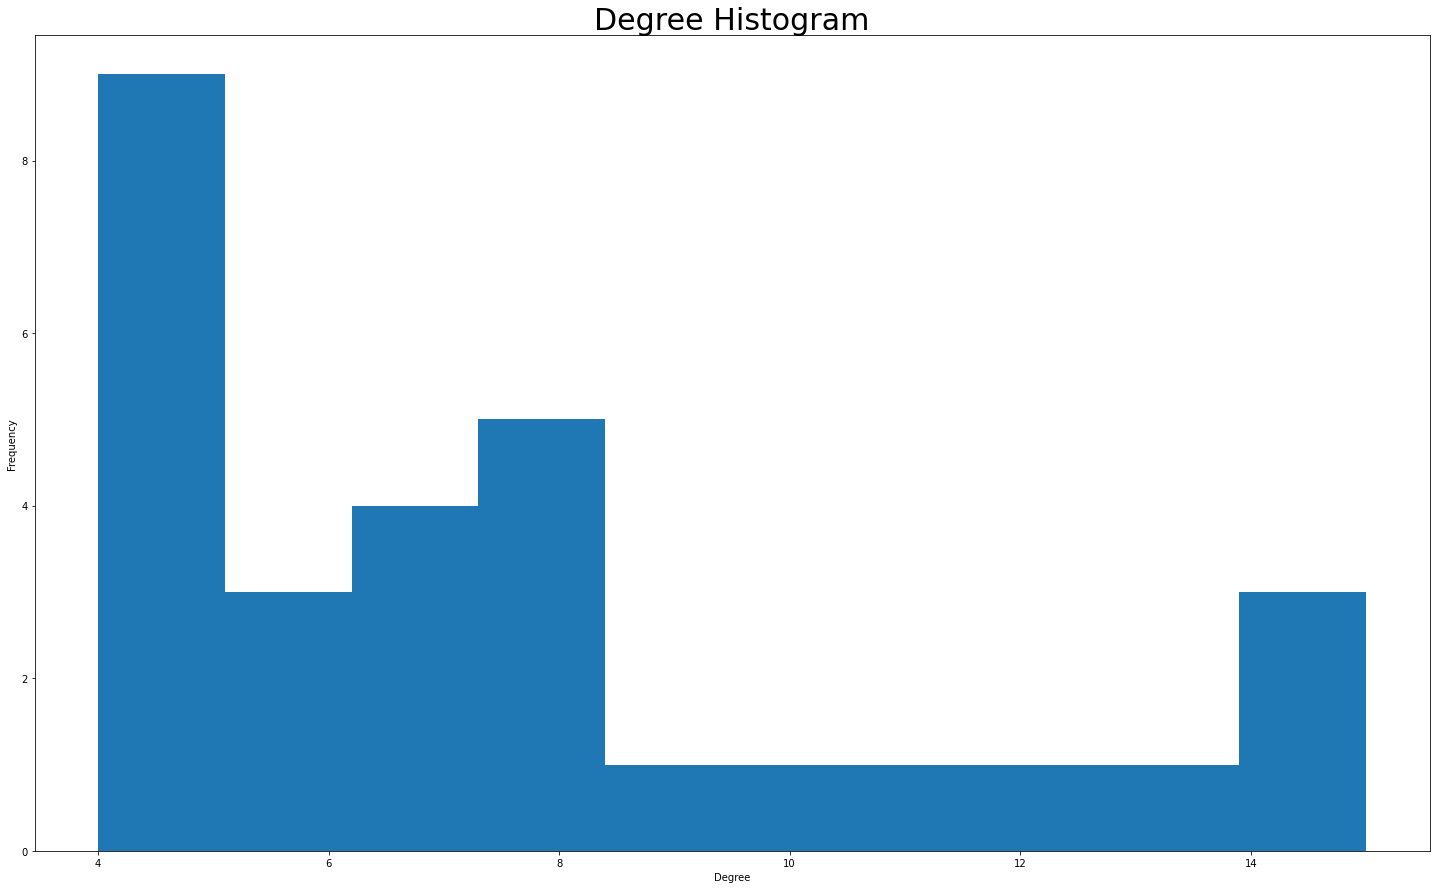

In [5]:
# Density, Connectivity, and Degree Histogram

print(nx.density(G))
print(nx.edge_connectivity(G))

degrees = [G.degree(n) for n in G.nodes()]
plt.figure(figsize=(25, 15)) 
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Histogram', fontsize=30)
plt.hist(degrees)
plt.show()

In [6]:
# binary_values = {'Blue': 0, 'Red': 1}

# node_values = np.array([binary_values[node] for node in G.nodes()])
# cmap = plt.get_cmap('viridis')
# node_colors = cmap(node_values)

In [7]:
sidecolor = {}

for i in G.nodes():
    df2 = df.loc[(df['ban1'] == i) | (df['ban2'] == i) | (df['ban3'] == i) | (df['ban4'] == i) | (df['ban5'] == i)]
    sidecolor[i] = np.mean(df2["side"])
    
for node in G.nodes():
    G.nodes[node]['side'] = sidecolor[node]

Text(0.5, 1.0, 'LoL 2023 Worlds Champion Ban Network (Play-Ins Day 1)')

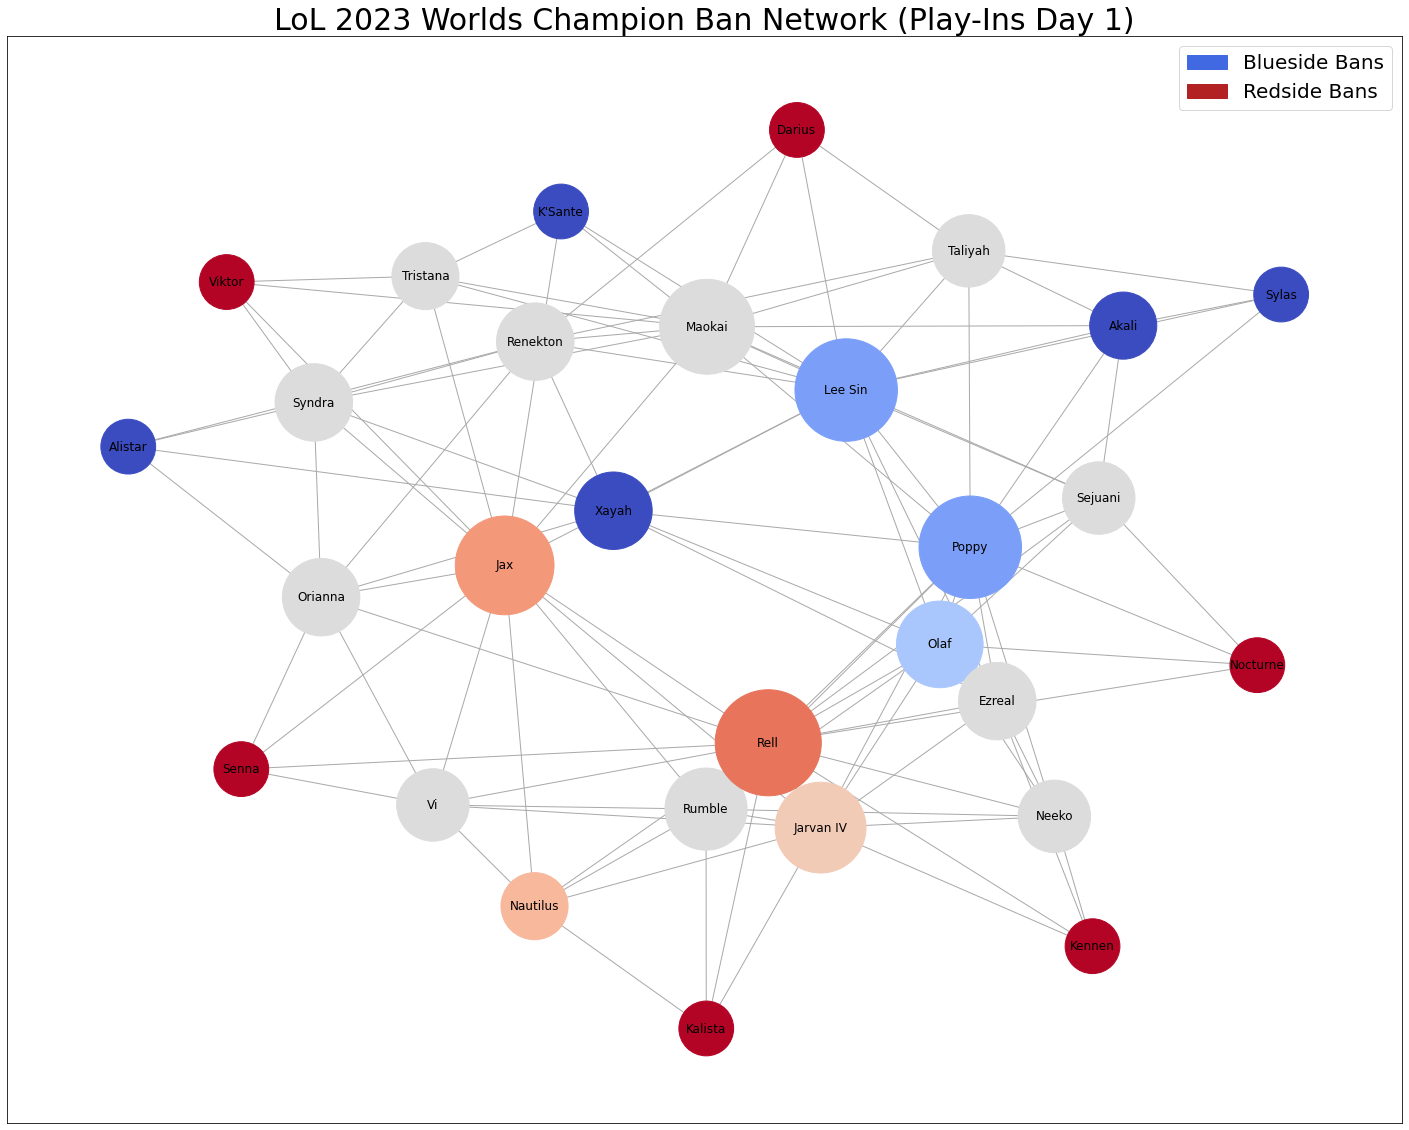

In [10]:
f = plt.figure(figsize=(25,20))
f.tight_layout()


import matplotlib.cm
cmap = matplotlib.cm.get_cmap('Reds')

colorlist = [G.nodes[node]['side'] for node in G.nodes()]
# nx.draw(G, pos=nx.spring_layout(G, seed = 8), node_color = colorlist, cmap = matplotlib.cm.get_cmap('bwr'))
nx.draw_networkx(G, pos=nx.spring_layout(G, seed = 8), 
                 with_labels=True, node_size=[v * 750 for v in d.values()],
                 edge_color = 'darkgrey'
                ,node_color = colorlist, 
                 cmap = matplotlib.cm.get_cmap('coolwarm'))

# Manually adding legend
patch1 = mpatches.Patch(color='royalblue', label='Blueside Bans')
patch2 = mpatches.Patch(color='firebrick', label='Redside Bans')
plt.legend(handles=[patch1, patch2], fontsize="20")

plt.title('LoL 2023 Worlds Champion Ban Network (Play-Ins Day 1)', fontsize=30)


In [9]:
# f = plt.figure(figsize=(25,20))
# f.tight_layout()


# # change the scalar(x) in "v * x" to change the size of the nodes apprortiate to the size of the data
# nx.draw_networkx(G, pos=nx.spring_layout(G, seed = 8), with_labels=True, node_size=[v * 150 for v in d.values()],edge_color = 'lightgrey')
# # Change node size scalar if scope is smaller (team) or larger (region)

# # Manually adding legend
# patch1 = mpatches.Patch(color='red', label='Top')
# patch2 = mpatches.Patch(color='blue', label='Jng')
# patch3 = mpatches.Patch(color='magenta', label='Mid')
# patch4 = mpatches.Patch(color='orange', label='Bot')
# patch5 = mpatches.Patch(color='yellow', label='Sup')
# plt.legend(handles=[patch1, patch2, patch3, patch4, patch5], fontsize="20")

# # Change title if there's no scope
# plt.title('LoLPro Champion Network (' + scope + ')', fontsize=30)
# # plt.title('LoLPro Champion Network (LCS, LEC, LCK, LPL)', fontsize=30)
